In [56]:
import scipy
from scipy.integrate import odeint

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import random

In [57]:
data=pd.read_csv("/Users/aishwaryasheelvant/Downloads/covid-19-data-master/rolling-averages/us-states.csv")

In [58]:
data
data['date'] = pd.to_datetime(data.date)

In [59]:
states=['Arizona','Nevada','California','Oregon']
data=data.loc[data['state'].isin(states)]

In [60]:
data

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06,California,1,0.14,0.00,0,0.00,0.00
10,2020-01-26,USA-06,California,1,0.29,0.00,0,0.00,0.00
11,2020-01-26,USA-04,Arizona,1,0.14,0.00,0,0.00,0.00
14,2020-01-27,USA-06,California,0,0.29,0.00,0,0.00,0.00
15,2020-01-27,USA-04,Arizona,0,0.14,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
54043,2022-11-02,USA-04,Arizona,5129,732.71,10.07,25,3.57,0.05
54064,2022-11-03,USA-41,Oregon,0,357.86,8.48,0,6.57,0.16
54073,2022-11-03,USA-32,Nevada,1741,281.13,9.13,0,2.14,0.07
54097,2022-11-03,USA-06,California,16778,3245.71,8.21,88,19.43,0.05


In [61]:
# start_date=datetime(2020,8,1)

# end_date=datetime(2021,4,31)
data=data.loc[(data.date>='2020-08-01') & (data.date<='2021-04-01')]

In [62]:
data.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
8336,2020-08-01,USA-41,Oregon,307,332.14,7.87,4,6.57,0.16
8345,2020-08-01,USA-32,Nevada,1065,1030.57,33.46,1,14.14,0.46
8369,2020-08-01,USA-06,California,7234,8025.71,20.31,143,133.86,0.34
8371,2020-08-01,USA-04,Arizona,2911,2423.43,33.29,58,66.43,0.91
8391,2020-08-02,USA-41,Oregon,280,333.29,7.90,2,6.71,0.16


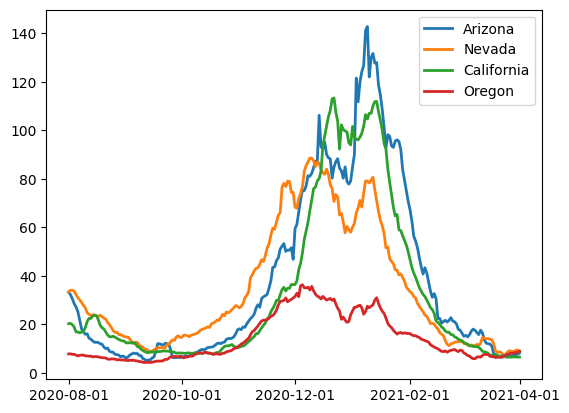

In [63]:
# ticks = [ '2020-08-01', '2020-10-01', '2020-12-01', '2021-02-01', '2020-12-01','2021-01-01','2021-02-01','2021-03-01']
# ticks = [ '2020-06-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01','2020-12-31']
ticks=['2020-08-01','2020-10-01','2020-12-01','2021-02-01','2021-04-01']
for s in states:
    selected_data=data.loc[data['state']==s]
    plt.plot(selected_data['date'],selected_data['cases_avg_per_100k'], label=s,linewidth=2)
plt.xticks(ticks)
# plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 8336 to 21736
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 976 non-null    datetime64[ns]
 1   geoid                976 non-null    object        
 2   state                976 non-null    object        
 3   cases                976 non-null    int64         
 4   cases_avg            976 non-null    float64       
 5   cases_avg_per_100k   976 non-null    float64       
 6   deaths               976 non-null    int64         
 7   deaths_avg           976 non-null    float64       
 8   deaths_avg_per_100k  976 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 76.2+ KB


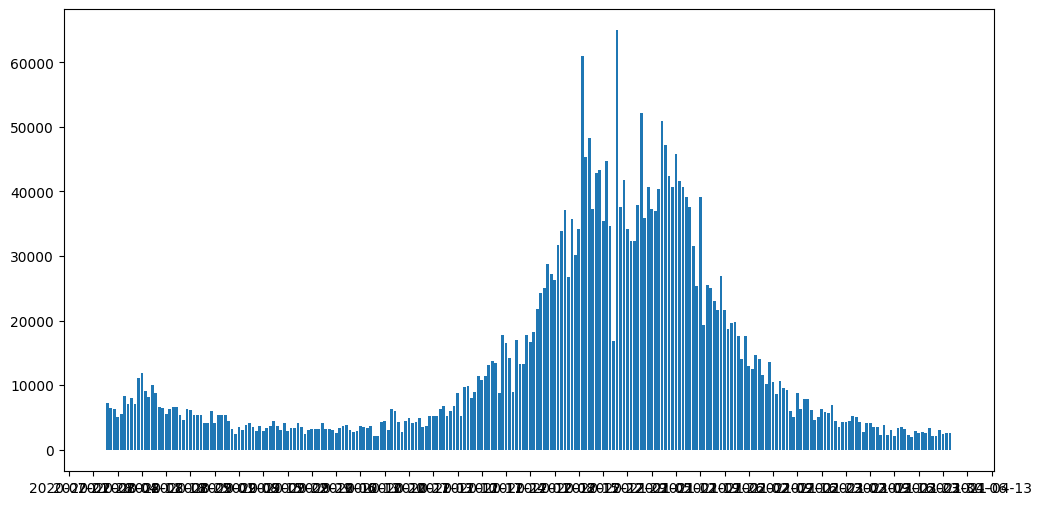

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
    
ax.bar(data['date'], data['cases'])
ax.xaxis_date()
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

In [66]:
from datetime import datetime
from datetime import timedelta
from dateutil import rrule

In [67]:
data['date_week'] = data['date'].apply(lambda x: x.isocalendar()[1])

data['date_year'] = data['date'].apply(lambda x: x.isocalendar()[0])


/var/folders/0j/3dv37qk57wd866ztr5tdy7l00000gn/T/ipykernel_17141/3875291559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_week'] = data['date'].apply(lambda x: x.isocalendar()[1])
/var/folders/0j/3dv37qk57wd866ztr5tdy7l00000gn/T/ipykernel_17141/3875291559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_year'] = data['date'].apply(lambda x: x.isocalendar()[0])


In [68]:
data

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_week,date_year
8336,2020-08-01,USA-41,Oregon,307,332.14,7.87,4,6.57,0.16,31,2020
8345,2020-08-01,USA-32,Nevada,1065,1030.57,33.46,1,14.14,0.46,31,2020
8369,2020-08-01,USA-06,California,7234,8025.71,20.31,143,133.86,0.34,31,2020
8371,2020-08-01,USA-04,Arizona,2911,2423.43,33.29,58,66.43,0.91,31,2020
8391,2020-08-02,USA-41,Oregon,280,333.29,7.90,2,6.71,0.16,31,2020
...,...,...,...,...,...,...,...,...,...,...,...
21681,2021-03-31,USA-04,Arizona,733,566.00,7.78,26,24.29,0.33,13,2021
21701,2021-04-01,USA-41,Oregon,511,378.00,8.96,2,2.43,0.06,13,2021
21710,2021-04-01,USA-32,Nevada,332,276.43,8.97,7,5.86,0.19,13,2021
21734,2021-04-01,USA-06,California,2642,2605.86,6.60,136,140.43,0.36,13,2021


In [69]:
data

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_week,date_year
8336,2020-08-01,USA-41,Oregon,307,332.14,7.87,4,6.57,0.16,31,2020
8345,2020-08-01,USA-32,Nevada,1065,1030.57,33.46,1,14.14,0.46,31,2020
8369,2020-08-01,USA-06,California,7234,8025.71,20.31,143,133.86,0.34,31,2020
8371,2020-08-01,USA-04,Arizona,2911,2423.43,33.29,58,66.43,0.91,31,2020
8391,2020-08-02,USA-41,Oregon,280,333.29,7.90,2,6.71,0.16,31,2020
...,...,...,...,...,...,...,...,...,...,...,...
21681,2021-03-31,USA-04,Arizona,733,566.00,7.78,26,24.29,0.33,13,2021
21701,2021-04-01,USA-41,Oregon,511,378.00,8.96,2,2.43,0.06,13,2021
21710,2021-04-01,USA-32,Nevada,332,276.43,8.97,7,5.86,0.19,13,2021
21734,2021-04-01,USA-06,California,2642,2605.86,6.60,136,140.43,0.36,13,2021


In [70]:
data[(data['date_week'] == 53) & (data['state'] == 'Arizona')] #924

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_week,date_year
16566,2020-12-28,USA-04,Arizona,10127,6181.57,84.93,42,71.00,0.98,53,2020
16621,2020-12-29,USA-04,Arizona,5932,5742.43,78.89,178,73.43,1.01,53,2020
16676,2020-12-30,USA-04,Arizona,4818,5665.71,77.84,79,77.43,1.06,53,2020
16731,2020-12-31,USA-04,Arizona,8463,5761.00,79.15,153,82.57,1.13,53,2020
16786,2021-01-01,USA-04,Arizona,6438,6182.00,84.93,136,86.57,1.19,53,2020
16841,2021-01-02,USA-04,Arizona,8895,6555.00,90.06,46,91.00,1.25,53,2020
16896,2021-01-03,USA-04,Arizona,17222,8842.14,121.48,0,91.00,1.25,53,2020


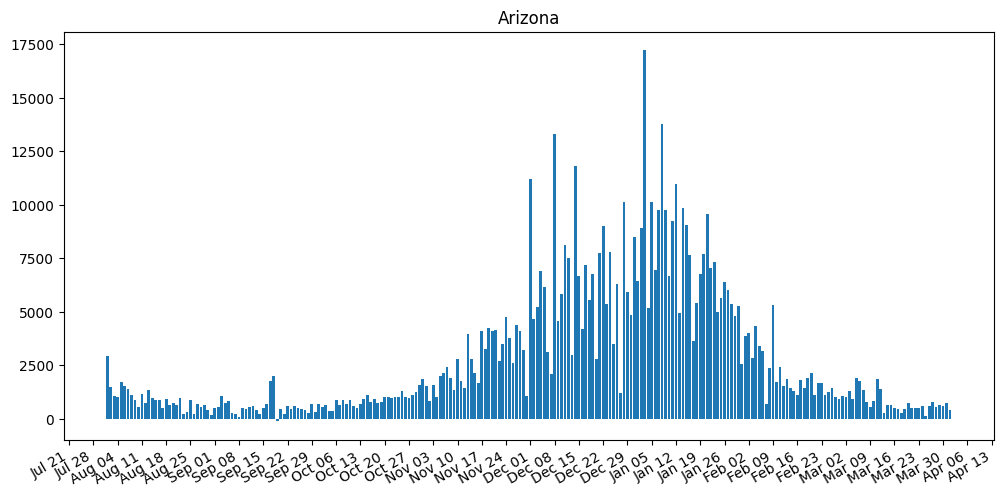

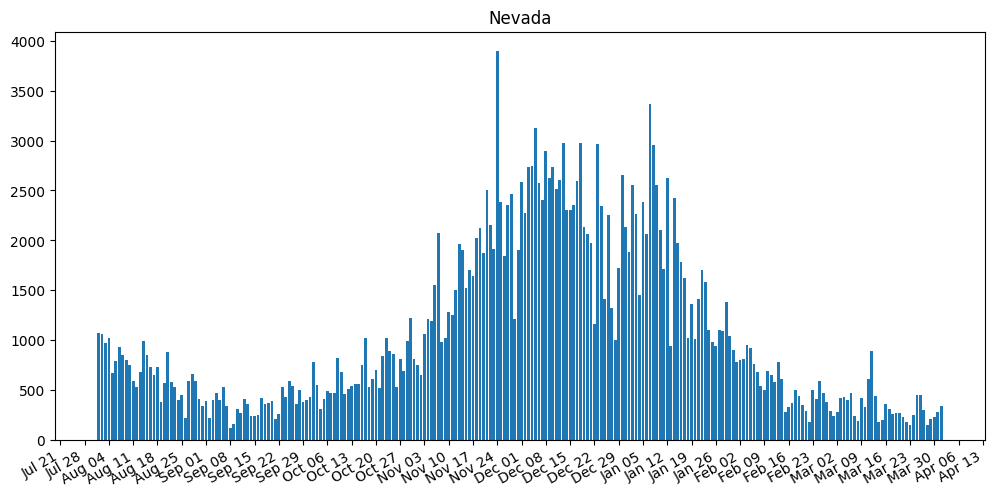

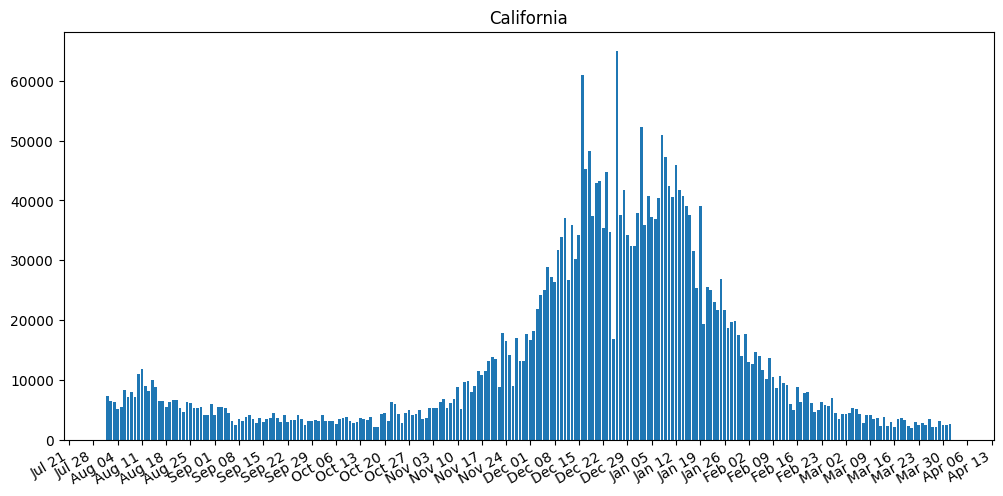

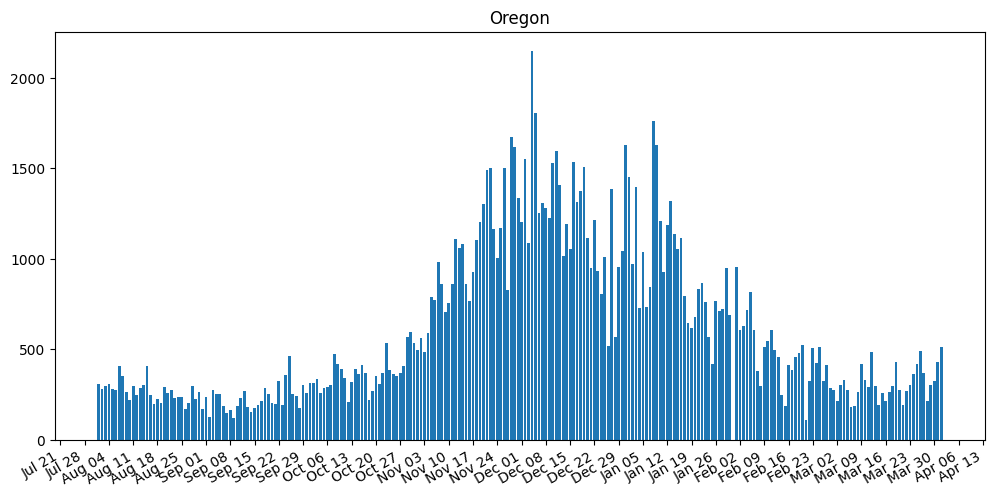

In [71]:
ticks=['2020-08-01','2020-10-01','2020-12-01','2021-02-01','2021-04-01']
for s in states:

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    selected_data=data.loc[data['state']==s]   
    ax.bar(selected_data['date'], selected_data['cases'])
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.gcf().autofmt_xdate()
    plt.title(s)
    plt.show()

In [72]:
df=data.groupby(['state','date_week']).mean().reset_index()
df

,state,date_week,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_year
0,Arizona,1,8880.285714,9237.632857,126.911429,154.285714,119.388571,1.640000,2021.0
1,Arizona,2,7905.142857,8931.348571,122.705714,160.714286,162.855714,2.238571,2021.0
2,Arizona,3,6956.000000,6984.754286,95.961429,138.857143,155.895714,2.144286,2021.0
3,Arizona,4,5143.142857,6165.385714,84.705714,126.000000,147.038571,2.021429,2021.0
4,Arizona,5,3185.142857,3982.387143,54.712857,133.000000,131.510000,1.808571,2021.0
...,...,...,...,...,...,...,...,...,...
139,Oregon,49,1482.285714,1411.205714,33.458571,18.000000,14.858571,0.351429,2020.0
140,Oregon,50,1336.714286,1436.081429,34.048571,17.857143,19.797143,0.468571,2020.0
141,Oregon,51,1296.714286,1297.817143,30.770000,26.142857,22.284286,0.527143,2020.0
142,Oregon,52,972.000000,1122.001429,26.601429,13.571429,19.837143,0.468571,2020.0


In [73]:
count=0
def epi_week(week):             #to get epiweek
    global count
    count+=1
    if week==31:
        count=1
    if week==1:
        count=24
    return count

df["EPI_WEEK"] = df['date_week'].apply(epi_week)

In [74]:
df.loc[df['state']=='Arizona']

,state,date_week,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_year,EPI_WEEK
0,Arizona,1,8880.285714,9237.632857,126.911429,154.285714,119.388571,1.640000,2021.0,24
1,Arizona,2,7905.142857,8931.348571,122.705714,160.714286,162.855714,2.238571,2021.0,25
2,Arizona,3,6956.000000,6984.754286,95.961429,138.857143,155.895714,2.144286,2021.0,26
3,Arizona,4,5143.142857,6165.385714,84.705714,126.000000,147.038571,2.021429,2021.0,27
4,Arizona,5,3185.142857,3982.387143,54.712857,133.000000,131.510000,1.808571,2021.0,28
5,Arizona,6,2380.714286,2707.020000,37.192857,132.428571,129.960000,1.784286,2021.0,29
6,Arizona,7,1530.000000,1664.182857,22.862857,75.285714,90.164286,1.238571,2021.0,30
7,Arizona,8,1283.571429,1485.428571,20.408571,67.857143,85.990000,1.180000,2021.0,31
8,Arizona,9,1317.428571,1175.918571,16.155714,49.714286,66.121429,0.910000,2021.0,32
9,Arizona,10,898.428571,1148.164286,15.774286,32.142857,46.651429,0.641429,2021.0,33


In [75]:
 # fig, ax = plt.subplots(1, 1, figsize=(12,6))
import altair as alt
selected_data=data.loc[data['state']=='Arizona']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Arizona'))
)

points + line


alt.LayerChart(...)

In [76]:
pd.to_datetime(selected_data.date).dt.month


8371     8
8426     8
8481     8
8536     8
8591     8
        ..
21516    3
21571    3
21626    3
21681    3
21736    4
Name: date, Length: 244, dtype: int64

/Users/aishwaryasheelvant/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3543: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


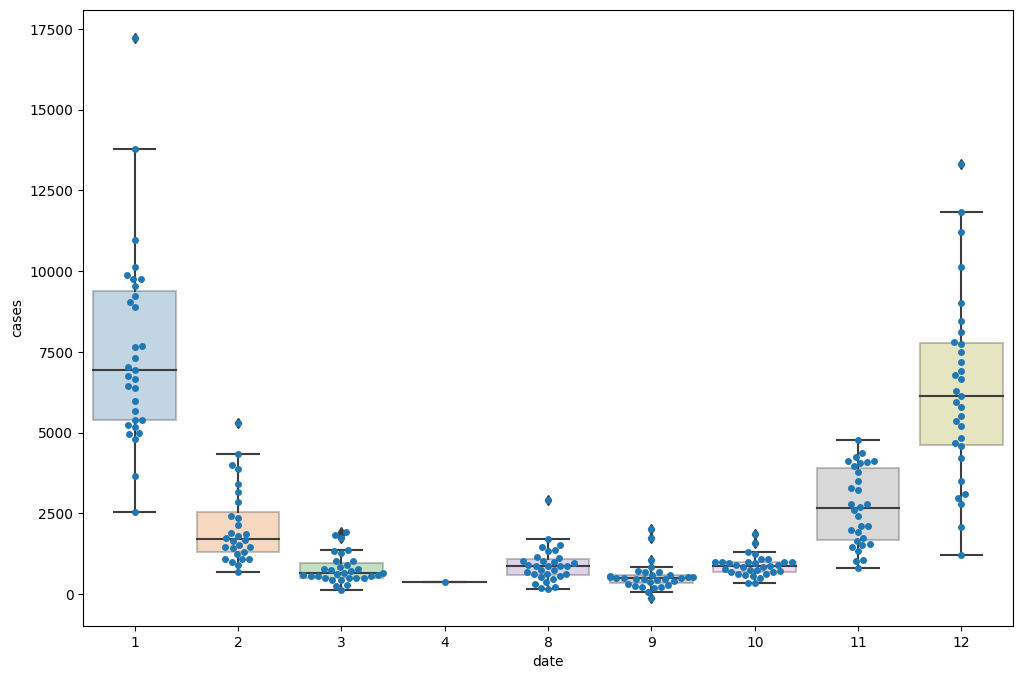

In [77]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [78]:
selected_data=data.loc[data['state']=='California']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in California'))
)

points + line

alt.LayerChart(...)

/Users/aishwaryasheelvant/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3543: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


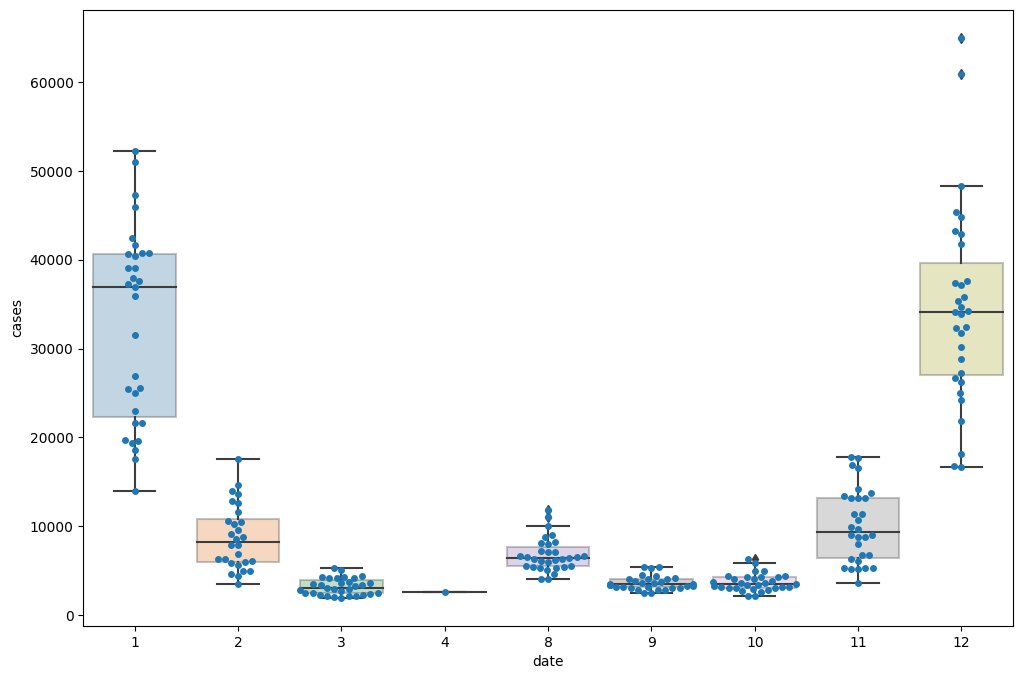

In [79]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [80]:
selected_data=data.loc[data['state']=='Nevada']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Nevada'))
)

points + line

alt.LayerChart(...)

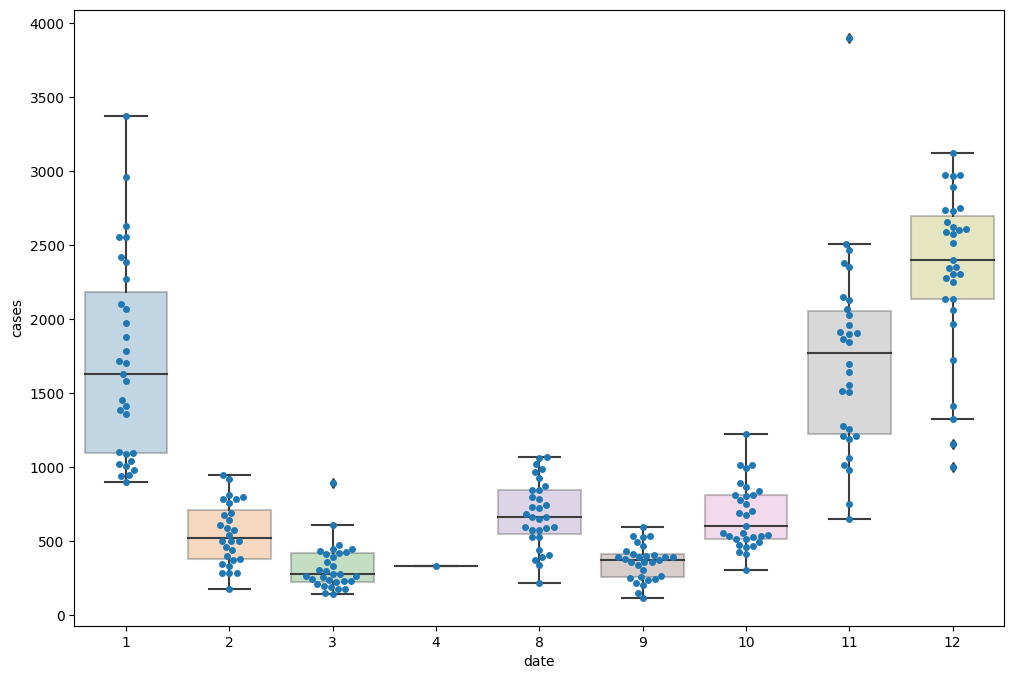

In [81]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [82]:
selected_data=data.loc[data['state']=='Oregon']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Oregon'))
)

points + line

alt.LayerChart(...)

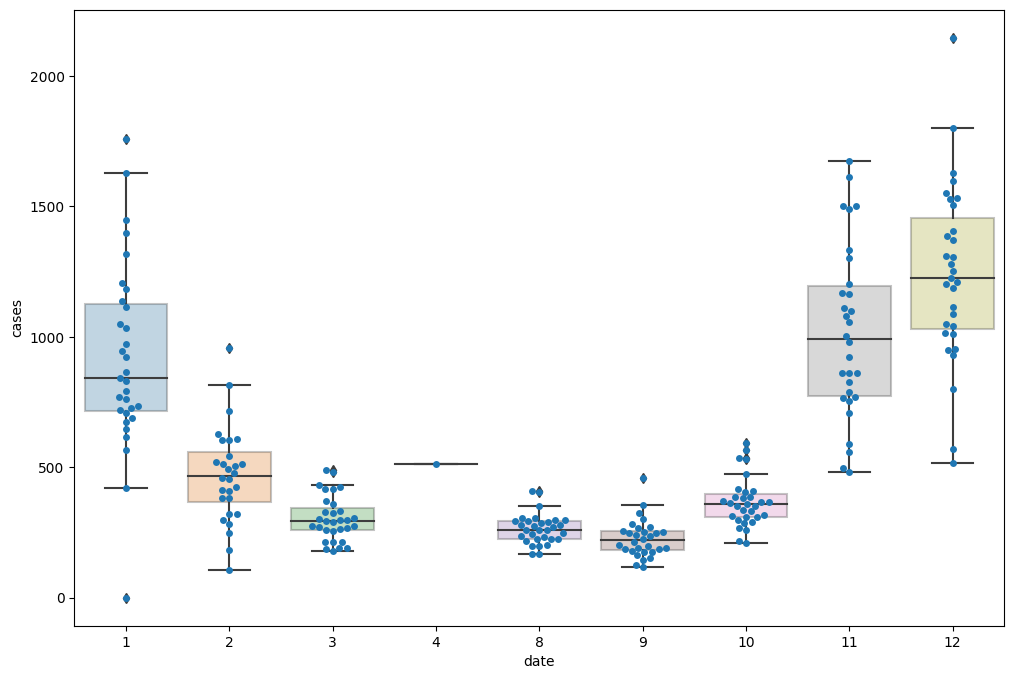

In [83]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');